## Treinamento de Modelo

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc

In [8]:
data = pd.read_csv("https://drive.google.com/uc?id=1LRcBICQ9CD7AiibpLMU-GTJBFTfRnV8Y")

In [9]:
display(data)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


### Pré-processamento

Mês é, na prática, uma feature categórica. Vamos, portanto, realizar o OneHotEncoding desta coluna:

In [10]:
data = pd.get_dummies(data, columns=['month'])
display(data)

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,month_6,month_7,month_8,month_9
0,1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,True,False,False,False
1,2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,True,False,False,False
2,3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,True,False,False,False
3,4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,True,False,False,False
4,5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,False,False,False,True
239,27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,False,False,False,True
240,28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,False,False,False,True
241,29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,False,False,False,True


Traremos a coluna *Rain* para a escala logarítimica, na tentativa de lidar com seu grande número de outliers:

In [11]:
data['Rain'] = np.log(data['Rain'] + 1)

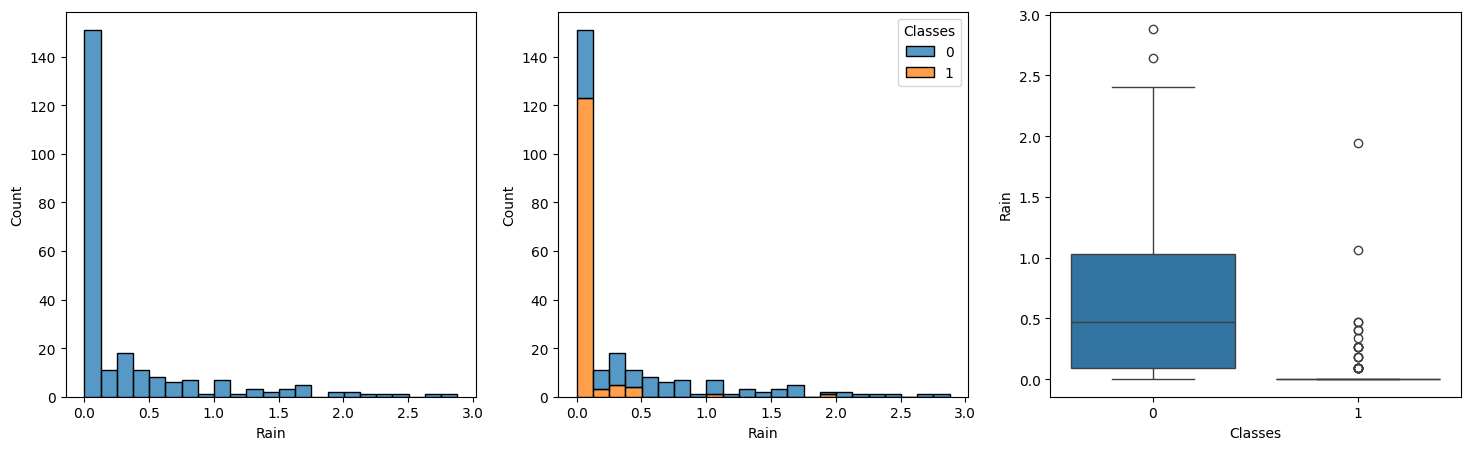

In [12]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.histplot(data = data, x = "Rain")
plt.subplot(1,3,2)
sns.histplot(data = data, x = "Rain", hue = "Classes", multiple="stack")
plt.subplot(1,3,3)
sns.boxplot(data = data, y = "Rain", x = "Classes")
plt.show()

Realizaremos, por fim, a normalização (Min-Max Scaling) dos dados, a fim de melhorar o resultado dos modelos:

In [14]:
X = data.drop(columns = "Classes")
y = data["Classes"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Treinamento

Divisão de Treino e Teste:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Testando diferentes tipos de modelos:

In [ ]:
!pip install lazypredict

from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [24]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.17
BaggingClassifier,1.00,1.00,1.00,1.00,0.34
XGBClassifier,1.00,1.00,1.00,1.00,0.29
RandomForestClassifier,1.00,1.00,1.00,1.00,1.10
LGBMClassifier,1.00,1.00,1.00,1.00,0.30
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.20
LinearSVC,0.98,0.98,0.98,0.98,0.07
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.72
Perceptron,0.98,0.98,0.98,0.98,0.05


Dentre os modelos, o que alcança um resultado bastante satisfatório em um tempo pequeno é o Support Vector Machine (LinearSVC). Por isso, utilizaremos ele no treinamento do modelo preditor.

In [29]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Acurácia do Modelo de Treino e Teste:

In [31]:
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Acurácia Treino: {train_accuracy:.2f}")
print(f"Acurácia Teste: {accuracy:.2f}")

Acurácia Treino: 0.96
Acurácia Teste: 0.96


Precisão e Recall para Teste:

In [34]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
print(f"Precisão: {precision:.2f}")

Recall: 0.92
Precisão: 1.00


Matriz de Confusão:

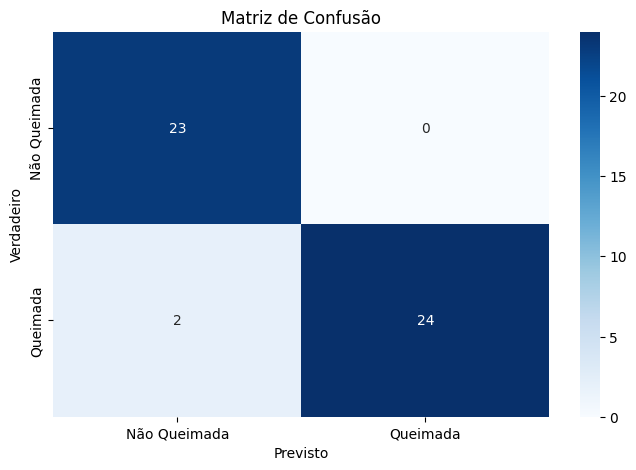

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Queimada", "Queimada"], yticklabels=["Não Queimada", "Queimada"])
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()